In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

# Paper DATA

In [3]:
header_file = 'Data/catalog_NGC1960_header.txt'

with open(header_file, 'r') as f:
    lines = f.readlines()

# Extract the 2nd column from each line (the actual column name)
column_names = [re.split(r'\s+', line.strip())[1] for line in lines]

NGC_1960_data=pd.read_csv("Data/catalog_NGC1960.dat",sep=r'\s+',names=column_names)

display(NGC_1960_data)

,ID,X,Y,RA,DEC,U,eU,B,eB,V,...,eH,K,eK,p,ep,mu_x,e_mu_x,mu_y,e_mu_y,Prob
0,1,672.691,407.299,05:36:23.05,+34:10:32.8,8.276,9.999,9.106,0.067,8.291,...,0.019,8.942,0.017,0.672,0.056,-0.439,0.101,-3.398,0.075,0.91
1,2,519.150,525.390,05:36:15.79,+34:08:36.9,8.219,9.999,8.879,9.999,8.880,...,0.017,8.846,0.017,0.514,0.068,-0.695,0.107,-3.586,0.086,0.66
2,3,142.860,138.930,05:36:39.24,+34:03:50.1,8.482,9.999,9.082,9.999,9.060,...,0.021,8.957,0.018,0.789,0.062,0.104,0.107,-3.864,0.075,0.74
3,4,692.598,261.029,05:36:31.99,+34:10:47.2,8.472,0.006,9.100,9.999,9.090,...,0.019,9.108,0.015,0.756,0.050,0.299,0.100,-3.491,0.075,0.87
4,5,-187.535,1042.736,05:35:44.08,+33:59:44.4,99.999,9.999,9.105,0.021,9.099,...,0.020,9.030,0.017,1.066,0.056,1.278,0.112,-3.183,0.083,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,3958,151.295,829.527,05:35:57.13,+34:03:59.3,99.999,9.999,99.999,9.999,99.999,...,9.999,99.999,9.999,0.071,0.703,-7.079,1.604,2.209,1.154,0.00
3958,3959,866.494,809.277,05:35:58.56,+34:13:01.1,99.999,9.999,99.999,9.999,99.999,...,9.999,99.999,9.999,-0.286,0.760,-1.088,1.690,-2.746,1.362,0.40
3959,3960,184.880,805.751,05:35:58.58,+34:04:24.7,99.999,9.999,99.999,9.999,99.999,...,9.999,99.999,9.999,-0.152,0.712,3.151,1.626,-1.298,1.115,0.03
3960,3961,681.791,817.996,05:35:57.98,+34:10:41.2,99.999,9.999,99.999,9.999,99.999,...,9.999,99.999,9.999,-1.668,0.929,0.721,1.724,-4.789,1.142,0.29


In [4]:
column_names

['ID',
 'X',
 'Y',
 'RA',
 'DEC',
 'U',
 'eU',
 'B',
 'eB',
 'V',
 'eV',
 'R',
 'eR',
 'I',
 'eI',
 'J',
 'eJ',
 'H',
 'eH',
 'K',
 'eK',
 'p',
 'ep',
 'mu_x',
 'e_mu_x',
 'mu_y',
 'e_mu_y',
 'Prob']

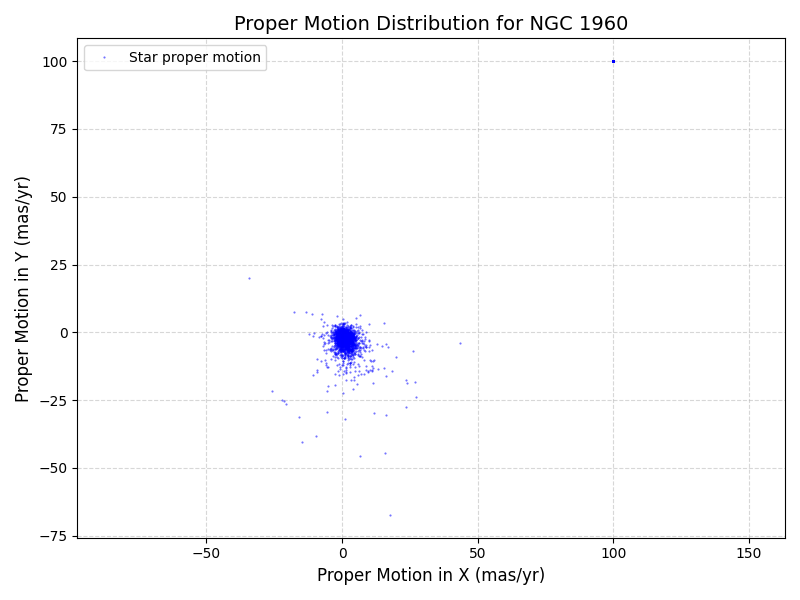

In [5]:
plt.figure(figsize=(8, 6))  # Optional: larger figure size
plt.plot(
    NGC_1960_data.mu_x, 
    NGC_1960_data.mu_y, 
    'bo', 
    markersize=0.5,  # smaller marker size
    alpha=0.6,     # optional: make points slightly transparent
    label='Star proper motion'
)

# Add labels and title
plt.xlabel('Proper Motion in X (mas/yr)', fontsize=12)
plt.ylabel('Proper Motion in Y (mas/yr)', fontsize=12)
plt.title('Proper Motion Distribution for NGC 1960', fontsize=14)

plt.xlim(-4.0, 6.0)
plt.ylim(-8.0, 2.0)


plt.axis('equal')
# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
#plt.xlim(-4.0, 6.0)
#plt.ylim(-8.0, 2.0)
plt.tight_layout()
plt.show()

Data from the paper

-4 to -3 in y and -0.6 to +0.6 in x: from visual inspection we can filter out to estimate cluster members

In [6]:
Df_member=NGC_1960_data[(NGC_1960_data.mu_x>=-0.6) & (NGC_1960_data.mu_x<=0.6) & (NGC_1960_data.mu_y>=-4) & (NGC_1960_data.mu_y<=-3)]

In [7]:
Df_member # Clustem mebmers data

,ID,X,Y,RA,DEC,U,eU,B,eB,V,...,eH,K,eK,p,ep,mu_x,e_mu_x,mu_y,e_mu_y,Prob
0,1,672.691,407.299,05:36:23.05,+34:10:32.8,8.276,9.999,9.106,0.067,8.291,...,0.019,8.942,0.017,0.672,0.056,-0.439,0.101,-3.398,0.075,0.91
2,3,142.860,138.930,05:36:39.24,+34:03:50.1,8.482,9.999,9.082,9.999,9.060,...,0.021,8.957,0.018,0.789,0.062,0.104,0.107,-3.864,0.075,0.74
3,4,692.598,261.029,05:36:31.99,+34:10:47.2,8.472,0.006,9.100,9.999,9.090,...,0.019,9.108,0.015,0.756,0.050,0.299,0.100,-3.491,0.075,0.87
5,6,473.710,413.770,05:36:22.59,+34:08:02.0,8.488,9.999,9.148,9.999,9.150,...,0.019,9.112,0.018,0.782,0.065,-0.151,0.131,-3.451,0.097,0.94
6,7,797.690,92.870,05:36:42.30,+34:12:06.0,8.610,9.999,9.147,9.999,9.140,...,0.021,8.525,0.019,0.764,0.058,0.159,0.107,-3.519,0.081,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,3884,742.095,691.481,05:36:05.72,+34:11:26.5,99.999,9.999,99.999,9.999,20.581,...,0.194,15.421,0.148,1.318,0.440,-0.010,0.902,-3.176,0.671,0.69
3901,3902,1184.152,23.555,05:36:46.69,+34:16:58.5,99.999,9.999,99.999,9.999,20.650,...,0.092,15.222,0.117,0.702,0.379,-0.524,1.014,-3.445,0.712,0.66
3904,3905,387.970,950.660,05:35:49.80,+34:06:59.1,99.999,9.999,99.999,9.999,20.683,...,0.101,15.154,0.124,1.480,0.640,-0.481,1.199,-3.398,0.911,0.58
3936,3937,185.773,602.149,05:36:11.00,+34:04:24.6,99.999,9.999,99.999,9.999,20.927,...,0.143,15.514,0.160,1.978,0.635,-0.112,1.288,-3.538,0.921,0.57


In [8]:
#Just a function to convert str to numbers
def ra_to_deg(ra_str):
    """Convert RA from hh:mm:ss.ss to decimal degrees"""
    try:
        hh, mm, ss = map(float, ra_str.strip().split(':'))
        return (hh + mm/60 + ss/3600) * 15  # 1 hour = 15 degrees
    except:
        return None

def dec_to_deg(dec_str):
    """Convert DEC from ±dd:mm:ss.ss to decimal degrees"""
    try:
        sign = -1 if dec_str.strip().startswith('-') else 1
        dd, mm, ss = map(float, dec_str.strip().lstrip('+-').split(':'))
        return sign * (dd + mm/60 + ss/3600)
    except:
        return None

In [9]:
NGC_1960_data['RA_deg'] = NGC_1960_data['RA'].apply(ra_to_deg)
NGC_1960_data['DEC_deg'] = NGC_1960_data['DEC'].apply(dec_to_deg)

In [10]:
Df_member['RA_deg'] = Df_member['RA'].apply(ra_to_deg)
Df_member['DEC_deg'] = Df_member['DEC'].apply(dec_to_deg)

/tmp/ipykernel_48261/3245627688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_member['RA_deg'] = Df_member['RA'].apply(ra_to_deg)
/tmp/ipykernel_48261/3245627688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_member['DEC_deg'] = Df_member['DEC'].apply(dec_to_deg)


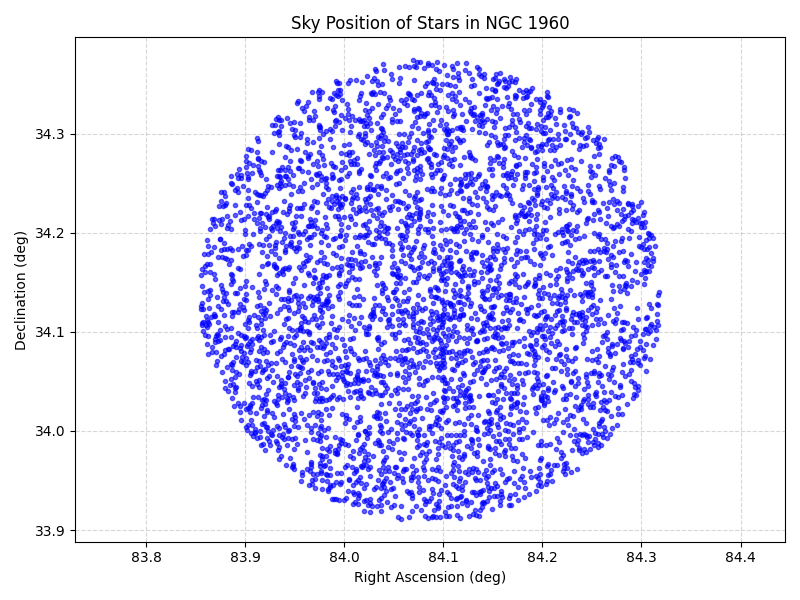

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(NGC_1960_data.RA_deg, NGC_1960_data.DEC_deg, 'bo', markersize=3, alpha=0.6)
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.axis('equal')
plt.title('Sky Position of Stars in NGC 1960')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Above is the plot of complete data set from the paper

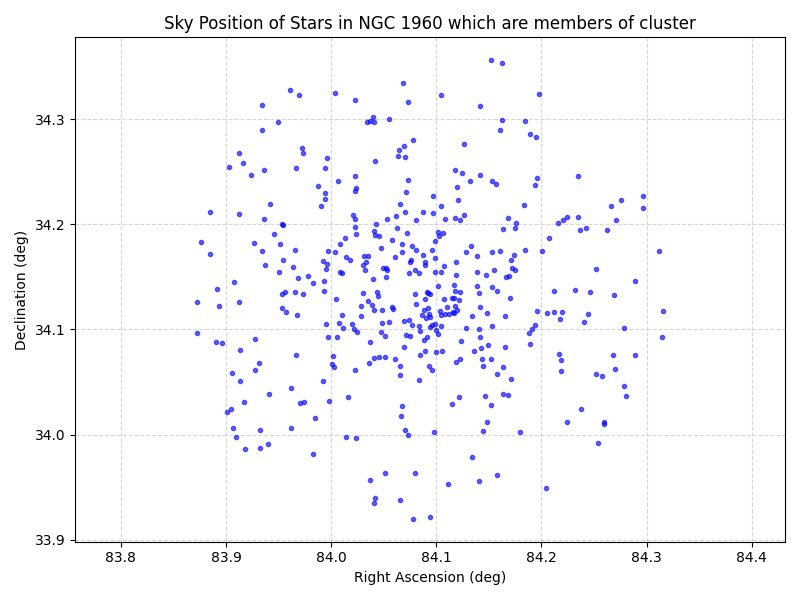

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(Df_member.RA_deg, Df_member.DEC_deg, 'bo', markersize=3, alpha=0.6)
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.axis('equal')
plt.title('Sky Position of Stars in NGC 1960 which are members of cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The plot above gives the sky distribuion of cluster members which were filtered from visual inspection.

In [13]:
# Just estimating centre coordinates
print(np.mean(NGC_1960_data['RA_deg']))
print(np.mean(NGC_1960_data['DEC_deg']))

84.08463687321216
34.13780913119075


In [14]:
def angular_distance(ra1, dec1, ra2, dec2):
    """Compute angular distance (in degrees) using spherical law of cosines."""
    ra1_rad, dec1_rad = np.radians(ra1), np.radians(dec1)
    ra2_rad, dec2_rad = np.radians(ra2), np.radians(dec2)
    
    delta_ra = ra2_rad - ra1_rad
    return np.degrees(np.arccos(
        np.sin(dec1_rad) * np.sin(dec2_rad) + 
        np.cos(dec1_rad) * np.cos(dec2_rad) * np.cos(delta_ra)
    ))

# Step 1: Get center coordinates (mean or median)
RA_center = NGC_1960_data['RA_deg'].median()
DEC_center = NGC_1960_data['DEC_deg'].median()

# Step 2: Compute angular distances from center to each point
distances = angular_distance(
    RA_center, DEC_center,
    NGC_1960_data['RA_deg'], NGC_1960_data['DEC_deg']
)

# Step 3: Radius is max distance from center
radius_deg = distances.max()

print(f"Estimated center: RA = {RA_center:.4f} deg, DEC = {DEC_center:.4f} deg")
print(f"Estimated radius: {radius_deg:.4f} deg")

Estimated center: RA = 84.0876 deg, DEC = 34.1333 deg
Estimated radius: 0.2414 deg


# Gaia Data

In [15]:
from astropy.io.votable import parse_single_table

In [16]:
table = parse_single_table("Data/1747086419381O-result.vot")
data = table.to_table()  # Convert to Astropy Table

In [17]:
data['radial_velocity'].mean()

0.39595401161595395

In [18]:
data

DESIGNATION,SOURCE_ID,ra,dec,parallax,pmra,pmdec,ruwe,phot_g_mean_mag,bp_rp,radial_velocity,phot_variable_flag,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,azero_gspphot,ag_gspphot,ebpminrp_gspphot,target_id,target_ra,target_dec,target_parallax,target_pm_ra,target_pm_dec,target_radial_velocity,epoch,target_separation__deg_
,,deg,deg,mas,mas / yr,mas / yr,,mag,mag,km / s,,,,,,,,,,K,log(cm.s**-2),dex,pc,mag,mag,mag,,,,,,,,,
object,int64,float64,float64,float64,float64,float64,float32,float32,float32,float32,object,int16,bool,bool,bool,bool,bool,bool,bool,float32,float32,float32,float32,float32,float32,float32,object,float64,float64,float64,float64,float64,float64,int32,float64
Gaia DR3 3449518376949056768,3449518376949056768,84.08381677226677,34.13355891702113,0.5126530366886541,-1.346901826859948,-3.519852883627191,1.0201288,19.445866,3.2248096,--,NOT_AVAILABLE,0,False,False,False,False,False,False,False,--,--,--,--,--,--,--,NGC1960,84.084,34.135,0.835,-0.155,-3.388,7.03,2000,0.0014339947003734533
Gaia DR3 3449518308229644672,3449518308229644672,84.08748071600417,34.13582322826262,0.9734703426277295,2.8596274052607553,-6.294408432305142,1.0030426,12.102562,0.5094919,--,NOT_AVAILABLE,0,True,True,False,False,False,True,True,8214.489,4.0251,-0.036,1014.4543,0.6946,0.6326,0.3377,NGC1960,84.084,34.135,0.835,-0.155,-3.388,7.03,2000,0.0030011772045098624
Gaia DR3 3449518381245283968,3449518381245283968,84.0796999420138,34.13320990307269,0.8272962522453929,-0.26003510344891634,-3.4532088252345434,0.9464266,13.821329,0.76135635,--,VARIABLE,0,True,True,False,True,False,True,True,7457.1914,4.2689,-0.52,1069.0555,0.8891,0.7816,0.4219,NGC1960,84.084,34.135,0.835,-0.155,-3.388,7.03,2000,0.003976717073689674
Gaia DR3 3449518312526057344,3449518312526057344,84.08870563503967,34.136149315960225,--,--,--,--,20.243383,0.62062263,--,NOT_AVAILABLE,0,False,False,False,False,False,False,False,--,--,--,--,--,--,--,NGC1960,84.084,34.135,0.835,-0.155,-3.388,7.03,2000,0.004065890675855593
Gaia DR3 3449518312525807616,3449518312525807616,84.08317950146196,34.12949379517341,1.0706214091534751,-0.8617565505984274,-3.552283683804487,1.1627287,19.745195,2.0633469,--,NOT_AVAILABLE,0,False,False,False,False,False,False,False,--,--,--,--,--,--,--,NGC1960,84.084,34.135,0.835,-0.155,-3.388,7.03,2000,0.005532903712436936
Gaia DR3 3449518312524030208,3449518312524030208,84.08300162882452,34.128975691760374,--,--,--,--,21.051636,--,--,NOT_AVAILABLE,0,False,False,False,False,False,False,False,--,--,--,--,--,--,--,NGC1960,84.084,34.135,0.835,-0.155,-3.388,7.03,2000,0.00606571416362521
Gaia DR3 3449518312525804032,3449518312525804032,84.09141017182952,34.135588909214256,0.8535499046942249,-0.25833228788190893,-3.47536725114589,1.0846362,9.322345,0.07443237,--,VARIABLE,0,True,True,False,True,False,True,True,16419.797,3.751,-0.9204,1245.8983,0.6044,0.5914,0.3191,NGC1960,84.084,34.135,0.835,-0.155,-3.388,7.03,2000,0.006163859762078743
Gaia DR3 3449518381243507328,3449518381243507328,84.07718875845022,34.13179618826859,--,--,--,--,20.716724,1.7472534,--,NOT_AVAILABLE,0,False,False,False,False,False,False,False,--,--,--,--,--,--,--,NGC1960,84.084,34.135,0.835,-0.155,-3.388,7.03,2000,0.006476589930556063


In [29]:
Df=data.to_pandas()
#Df

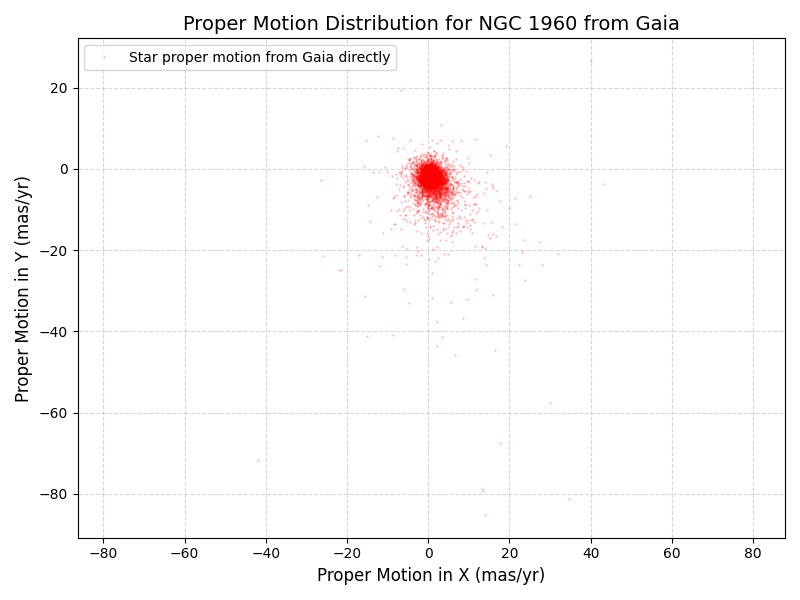

In [20]:
plt.figure(figsize=(8, 6))  # Optional: larger figure size
plt.plot(
    Df.pmra, 
    Df.pmdec, 
    'ro', 
    markersize=0.5,  # smaller marker size
    alpha=0.3,     # optional: make points slightly transparent
    label='Star proper motion from Gaia directly'
)
'''
plt.plot(
    NGC_1960_data.mu_x, 
    NGC_1960_data.mu_y, 
    'bo', 
    markersize=1,  # smaller marker size
    alpha=0.6,     # optional: make points slightly transparent
    label='Star proper motion from file given'
)
'''
plt.axis('equal')

# Add labels and title
plt.xlabel('Proper Motion in X (mas/yr)', fontsize=12)
plt.ylabel('Proper Motion in Y (mas/yr)', fontsize=12)
plt.title('Proper Motion Distribution for NGC 1960 from Gaia', fontsize=14)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
Df.radial_velocity.isna().sum()

9035

Note that out of 9320 sources only 285 have non nan value of radial velocity

In [22]:
Df2=Df[Df.radial_velocity.notna()] # filter GAIA-DR3 data based on non-nan value of radial velocity measurement

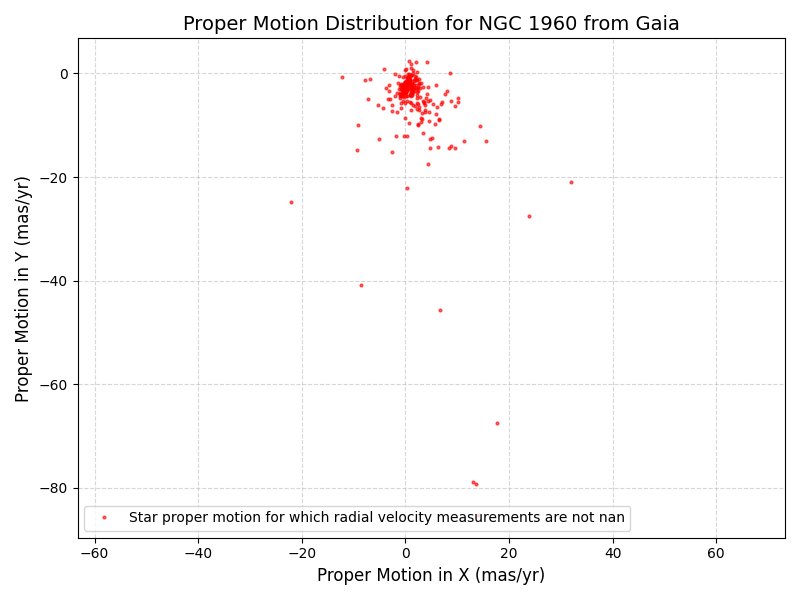

In [30]:
plt.figure(figsize=(8, 6))  # Optional: larger figure size
plt.plot(
    Df2.pmra, 
    Df2.pmdec, 
    'ro', 
    markersize=2,  # smaller marker size
    alpha=0.6,     # optional: make points slightly transparent
    label='Star proper motion for which radial velocity measurements are not nan'
)
'''
plt.plot(
    NGC_1960_data.mu_x, 
    NGC_1960_data.mu_y, 
    'bo', 
    markersize=1,  # smaller marker size
    alpha=0.6,     # optional: make points slightly transparent
    label='Star proper motion from file given'
)
'''
# Add labels and title
plt.xlabel('Proper Motion in X (mas/yr)', fontsize=12)
plt.ylabel('Proper Motion in Y (mas/yr)', fontsize=12)
plt.title('Proper Motion Distribution for NGC 1960 from Gaia', fontsize=14)
plt.axis('equal')
# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

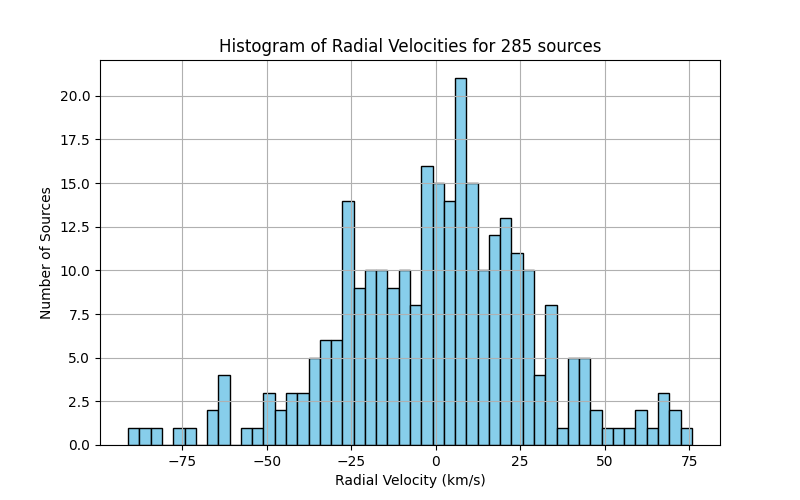

In [24]:
plt.figure(figsize=(8, 5))  # optional: set size (width, height)

# Your plotting code here
plt.hist(Df2.radial_velocity, bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Radial Velocity (km/s)")
plt.ylabel("Number of Sources")
plt.title("Histogram of Radial Velocities for 285 sources")
plt.grid(True)
plt.show()

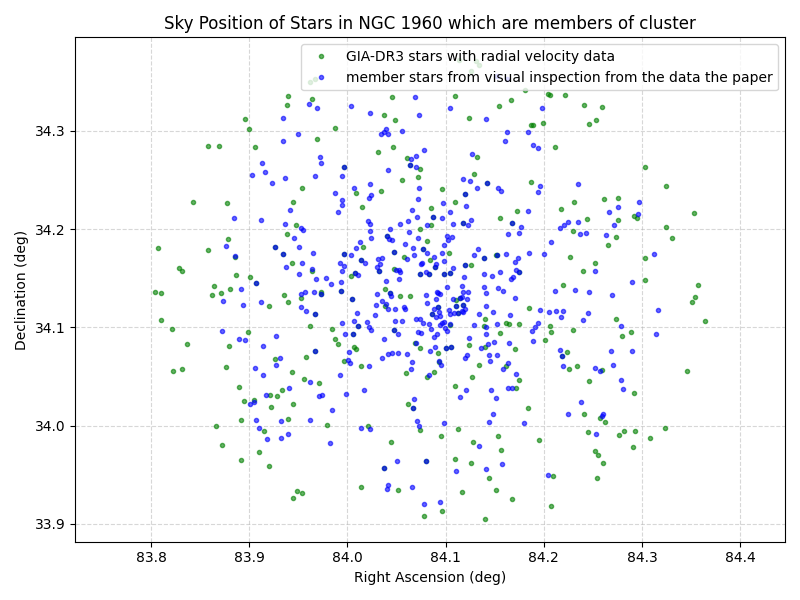

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(Df2.ra, Df2.dec, 'go', markersize=3, alpha=0.6, label="GIA-DR3 stars with radial velocity data")


plt.plot(Df_member.RA_deg, Df_member.DEC_deg, 'bo', markersize=3, alpha=0.6, label="member stars from visual inspection from the data the paper")
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.axis('equal')
plt.title('Sky Position of Stars in NGC 1960 which are members of cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Membership assignment

In [26]:
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity

In [27]:
def estimate_vpd_center_within_roi(df, 
                                   roi_x=(-2, 2), 
                                   roi_y=(-6, -1), 
                                   bandwidth=0.2):
    """
    Estimate VPD cluster center using KDE, restricted to a region of interest (ROI).
    
    Parameters:
    - df: DataFrame with 'pmra' and 'pmdec' columns
    - roi_x: Tuple (min, max) for pmra
    - roi_y: Tuple (min, max) for pmdec
    - bandwidth: KDE bandwidth

    Returns:
    - mu_center: (pmra, pmdec) of peak density within ROI
    - kde: KDE object fitted to restricted data
    - roi_df: DataFrame of stars inside the ROI
    """
    df['pmra'] = df['RA_deg']
    df['pmdec'] = df['DEC_deg']
    # Step 1: Subset data to region of interest
    roi_df = df[
        (df['pmra'] >= roi_x[0]) & (df['pmra'] <= roi_x[1]) &
        (df['pmdec'] >= roi_y[0]) & (df['pmdec'] <= roi_y[1])
    ].copy()

    if roi_df.empty:
        raise ValueError("No stars found in the selected ROI.")

    # Step 2: Estimate KDE within ROI
    coords = np.vstack([roi_df['pmra'], roi_df['pmdec']])
    kde = gaussian_kde(coords, bw_method=bandwidth)

    grid_x, grid_y = np.mgrid[
        roi_x[0]:roi_x[1]:100j,
        roi_y[0]:roi_y[1]:100j
    ]
    grid_coords = np.vstack([grid_x.ravel(), grid_y.ravel()])
    kde_values = kde(grid_coords).reshape(grid_x.shape)

    # Step 3: Find maximum density point
    max_idx = np.unravel_index(np.argmax(kde_values), kde_values.shape)
    mu_center = (grid_x[max_idx], grid_y[max_idx])

    return mu_center, kde, roi_df

In [28]:
centre,kde=estimate_vpd_center_within_roi(NGC_1960_data,bandwidth=1.5)

ValueError: No stars found in the selected ROI.

In [ ]:
NGC_1960_data

In [ ]:
df_selected, df_stars_with_r = vpd_radial_cut(NGC_1960_data, centre, radius_cut=0.7)

In [ ]:
df_selected

# Circular windowing 

In [32]:
from scipy.spatial import cKDTree

In [33]:
def member_stars(mu_x,mu_y,radius=0.5,plot_stars=False):
    proper_motions = np.vstack((mu_x, mu_y)).T

    # --- Parameters ---
      # mas/yr, circular window radius (adjust based on expected cluster spread)
    # --- Use KD-Tree for fast neighbor counting ---
    tree = cKDTree(proper_motions)
    neighbors = tree.query_ball_point(proper_motions, r=radius)
    counts = np.array([len(n) for n in neighbors])
    
    # --- Identify the star with the highest local density ---
    max_idx = np.argmax(counts)
    mu_center = proper_motions[max_idx] 
    print(f"Maximum density center in proper motion space:")
    print(f"μ_x = {mu_center[0]:.4f} mas/yr, μ_y = {mu_center[1]:.4f} mas/yr")
    
    # --- Plotting the VPD with the cluster center and circular window ---
    if plot_stars==True:
        plt.figure(figsize=(8, 6))
        plt.scatter(mu_x, mu_y, s=0.3, alpha=1, label='Stars')
        plt.plot(mu_center[0], mu_center[1], 'ro', label='Cluster center (max density)')
        circle = plt.Circle(mu_center, radius, color='red', fill=False, linestyle='--', label=f'Radius = {radius} mas/yr')
        plt.gca().add_patch(circle)
        plt.xlabel(r'$\mu_\alpha \cos(\delta)$ [mas/yr]')
        plt.ylabel(r'$\mu_\delta$ [mas/yr]')
        plt.title('Vector Point Diagram (Proper Motion Space)')
        plt.legend()
        plt.grid(True)
        plt.axis('equal')
        plt.show()
    return mu_center
    
        



Maximum density center in proper motion space:
μ_x = -0.1350 mas/yr, μ_y = -3.3360 mas/yr


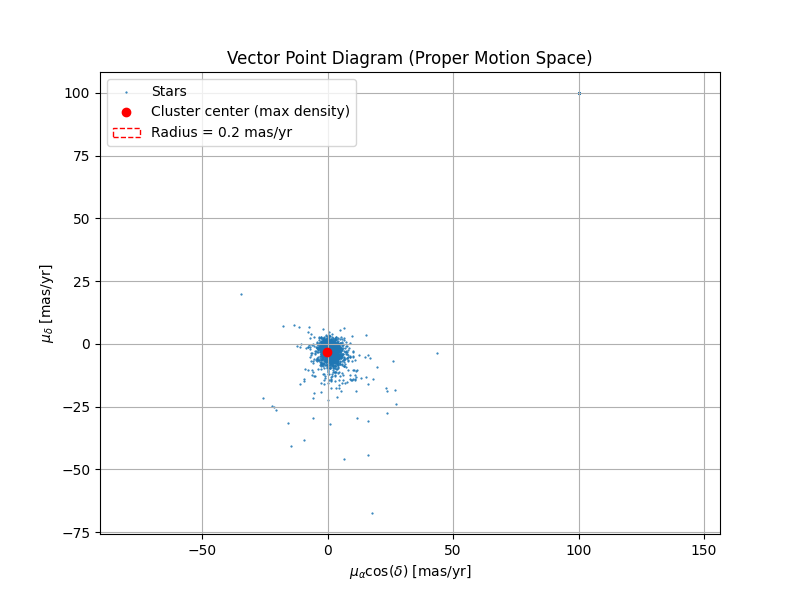

array([-0.135, -3.336])

In [34]:
member_stars(NGC_1960_data.mu_x,NGC_1960_data.mu_y,radius=0.2,plot_stars=True)

In [31]:
print((-0.13, -3.37))

(-0.13, -3.37)


# Radial distribution of Stars

In [ ]:
mu_center=member_stars(NGC_1960_data.mu_x,NGC_1960_data.mu_y,radius=0.2,plot_stars=False)

In [ ]:
mu_x=NGC_1960_data.mu_x
mu_y=NGC_1960_data.mu_y

In [ ]:
# Assuming you already have:
# - mu_x, mu_y as arrays of proper motion components
# - mu_center = [mu_x0, mu_y0] from the previous step

# 1. Compute radial distances from cluster center in proper motion space
r = np.sqrt((mu_x - mu_center[0])**2 + (mu_y - mu_center[1])**2)

# 2. Define radial bins (e.g., 30 bins up to max radius)
r_max = np.percentile(r, 95)  # limit outliers
n_bins = 50
r_bins = np.linspace(0, r_max, n_bins + 1)
r_mid = 0.5 * (r_bins[:-1] + r_bins[1:])

# 3. Count stars in each annulus
counts, _ = np.histogram(r, bins=r_bins)

# 4. Compute area of each annulus (π*(r_outer² - r_inner²))
area = np.pi * (r_bins[1:]**2 - r_bins[:-1]**2)
density = counts / area  # stars per (mas/yr)^2

# 5. Plot the radial density profile
plt.figure(figsize=(8, 5))
plt.plot(r_mid, density, 'o--',markersize=2, color='blue')
plt.xlabel('Radius from cluster center [mas/yr]')
plt.ylabel('Stellar number density [(mas/yr)$^{-2}$]')
plt.title('Radial Density Profile in Proper Motion Plane')
plt.grid(True)
plt.show()

# Claude 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.optimize import minimize
from sklearn.neighbors import KernelDensity
import pandas as pd

In [ ]:
class ClusterMemberSelector:
    """
    A class to identify cluster members from proper motion data using
    Vector Point Diagram (VPD) analysis, similar to the method used in
    Joshi et al. (2020) for NGC 1960.
    """
    
    def __init__(self, mu_ra, mu_dec, mu_ra_err=None, mu_dec_err=None):
        """
        Initialize with proper motion data.
        
        Parameters:
        -----------
        mu_ra : array-like
            Proper motion in right ascension (mas/yr)
        mu_dec : array-like  
            Proper motion in declination (mas/yr)
        mu_ra_err : array-like, optional
            Errors in mu_ra (mas/yr)
        mu_dec_err : array-like, optional
            Errors in mu_dec (mas/yr)
        """
        self.mu_ra = np.array(mu_ra)
        self.mu_dec = np.array(mu_dec)
        self.mu_ra_err = np.array(mu_ra_err) if mu_ra_err is not None else None
        self.mu_dec_err = np.array(mu_dec_err) if mu_dec_err is not None else None
        self.n_stars = len(self.mu_ra)
        
        # Results will be stored here
        self.cluster_center = None
        self.cluster_radius = None
        self.membership_flags = None
        self.membership_probabilities = None
        
    def find_cluster_center_density(self, bandwidth=0.1, grid_size=100):
        """
        Find cluster center using maximum density method with kernel density estimation.
        
        Parameters:
        -----------
        bandwidth : float
            Bandwidth for kernel density estimation
        grid_size : int
            Grid size for density evaluation
        
        Returns:
        --------
        tuple : (mu_ra_center, mu_dec_center)
        """
        # Create grid for density evaluation
        mu_ra_range = np.linspace(self.mu_ra.min() - 1, self.mu_ra.max() + 1, grid_size)
        mu_dec_range = np.linspace(self.mu_dec.min() - 1, self.mu_dec.max() + 1, grid_size)
        mu_ra_grid, mu_dec_grid = np.meshgrid(mu_ra_range, mu_dec_range)
        
        # Prepare data for KDE
        pm_data = np.column_stack([self.mu_ra, self.mu_dec])
        grid_points = np.column_stack([mu_ra_grid.ravel(), mu_dec_grid.ravel()])
        
        # Perform kernel density estimation
        kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
        kde.fit(pm_data)
        
        # Calculate density at grid points
        log_density = kde.score_samples(grid_points)
        density = np.exp(log_density).reshape(grid_size, grid_size)
        
        # Find maximum density location
        max_idx = np.unravel_index(np.argmax(density), density.shape)
        mu_ra_center = mu_ra_grid[max_idx]
        mu_dec_center = mu_dec_grid[max_idx]
        
        self.cluster_center = (mu_ra_center, mu_dec_center)
        return self.cluster_center
    
    def find_cluster_center_iterative(self, initial_radius=1.0, max_iterations=10):
        """
        Find cluster center using iterative approach.
        Start with rough estimate and refine by calculating mean of stars within radius.
        
        Parameters:
        -----------
        initial_radius : float
            Initial search radius (mas/yr)
        max_iterations : int
            Maximum number of iterations
        
        Returns:
        --------
        tuple : (mu_ra_center, mu_dec_center)
        """
        # Initial guess: median of all proper motions
        mu_ra_center = np.median(self.mu_ra)
        mu_dec_center = np.median(self.mu_dec)
        
        for i in range(max_iterations):
            # Calculate distances from current center
            distances = np.sqrt((self.mu_ra - mu_ra_center)**2 + 
                              (self.mu_dec - mu_dec_center)**2)
            
            # Select stars within radius
            within_radius = distances <= initial_radius
            
            if np.sum(within_radius) < 3:  # Need at least 3 stars
                break
                
            # Update center as mean of stars within radius
            new_mu_ra_center = np.mean(self.mu_ra[within_radius])
            new_mu_dec_center = np.mean(self.mu_dec[within_radius])
            
            # Check convergence
            if (abs(new_mu_ra_center - mu_ra_center) < 0.01 and 
                abs(new_mu_dec_center - mu_dec_center) < 0.01):
                break
                
            mu_ra_center = new_mu_ra_center
            mu_dec_center = new_mu_dec_center
        
        self.cluster_center = (mu_ra_center, mu_dec_center)
        return self.cluster_center
    
    def determine_cluster_radius(self, method='density_profile', n_bins=50):
        """
        Determine cluster radius by analyzing radial density profile.
        
        Parameters:
        -----------
        method : str
            Method to use: 'density_profile' or 'field_density'
        n_bins : int
            Number of radial bins for density profile
        
        Returns:
        --------
        float : cluster radius (mas/yr)
        """
        if self.cluster_center is None:
            raise ValueError("Must find cluster center first")
            
        mu_ra_center, mu_dec_center = self.cluster_center
        
        # Calculate distances from cluster center
        distances = np.sqrt((self.mu_ra - mu_ra_center)**2 + 
                          (self.mu_dec - mu_dec_center)**2)
        
        if method == 'density_profile':
            # Create radial bins
            max_radius = np.max(distances)
            radial_bins = np.linspace(0, max_radius, n_bins)
            bin_centers = (radial_bins[1:] + radial_bins[:-1]) / 2
            
            # Calculate number density in each annular bin
            densities = []
            for i in range(len(radial_bins)-1):
                r_inner = radial_bins[i]
                r_outer = radial_bins[i+1]
                
                # Area of annular bin
                area = np.pi * (r_outer**2 - r_inner**2)
                
                # Number of stars in bin
                in_bin = (distances >= r_inner) & (distances < r_outer)
                n_stars_bin = np.sum(in_bin)
                
                # Number density
                density = n_stars_bin / area if area > 0 else 0
                densities.append(density)
            
            densities = np.array(densities)
            
            # Find where density drops to field level
            # Use minimum density as field density estimate
            field_density = np.min(densities[densities > 0])
            
            # Find radius where density first drops close to field density
            # (within factor of 2)
            threshold = 2 * field_density
            cluster_radius_idx = np.where(densities <= threshold)[0]
            
            if len(cluster_radius_idx) > 0:
                self.cluster_radius = bin_centers[cluster_radius_idx[0]]
            else:
                # Fallback: use 70% of maximum radius
                self.cluster_radius = 0.7 * max_radius
                
        elif method == 'field_density':
            # Simple method: assume outer 20% of stars represent field
            sorted_distances = np.sort(distances)
            field_start_idx = int(0.8 * len(sorted_distances))
            
            # Use 90th percentile as rough cluster radius
            self.cluster_radius = np.percentile(distances, 90)
        
        return self.cluster_radius
    
    def calculate_membership_probabilities(self):
        """
        Calculate membership probabilities using statistical method
        similar to Balaguer-Nunez et al. (1998) as referenced in the paper.
        
        Returns:
        --------
        array : membership probabilities for each star
        """
        if self.cluster_center is None or self.cluster_radius is None:
            raise ValueError("Must find cluster center and radius first")
            
        mu_ra_center, mu_dec_center = self.cluster_center
        
        # Calculate distances from cluster center
        distances = np.sqrt((self.mu_ra - mu_ra_center)**2 + 
                          (self.mu_dec - mu_dec_center)**2)
        
        # Identify probable cluster members (within radius)
        cluster_candidates = distances <= self.cluster_radius
        n_cluster = np.sum(cluster_candidates)
        n_total = len(distances)
        
        # Calculate cluster and field parameters
        if n_cluster > 5:  # Need minimum number for statistics
            # Cluster parameters
            mu_ra_clust = np.mean(self.mu_ra[cluster_candidates])
            mu_dec_clust = np.mean(self.mu_dec[cluster_candidates])
            sigma_ra_clust = np.std(self.mu_ra[cluster_candidates])
            sigma_dec_clust = np.std(self.mu_dec[cluster_candidates])
            
            # Field parameters (use all stars for field estimate)
            mu_ra_field = np.mean(self.mu_ra)
            mu_dec_field = np.mean(self.mu_dec)
            sigma_ra_field = np.std(self.mu_ra)
            sigma_dec_field = np.std(self.mu_dec)
            
            # Normalized fractions
            f_cluster = n_cluster / n_total
            f_field = 1 - f_cluster
            
            # Calculate membership probabilities
            probabilities = []
            
            for i in range(len(self.mu_ra)):
                # Cluster likelihood (bivariate Gaussian)
                chi2_cluster = ((self.mu_ra[i] - mu_ra_clust)**2 / sigma_ra_clust**2 + 
                               (self.mu_dec[i] - mu_dec_clust)**2 / sigma_dec_clust**2)
                likelihood_cluster = np.exp(-0.5 * chi2_cluster) / (2 * np.pi * sigma_ra_clust * sigma_dec_clust)
                
                # Field likelihood (bivariate Gaussian)
                chi2_field = ((self.mu_ra[i] - mu_ra_field)**2 / sigma_ra_field**2 + 
                             (self.mu_dec[i] - mu_dec_field)**2 / sigma_dec_field**2)
                likelihood_field = np.exp(-0.5 * chi2_field) / (2 * np.pi * sigma_ra_field * sigma_dec_field)
                
                # Membership probability
                numerator = f_cluster * likelihood_cluster
                denominator = numerator + f_field * likelihood_field
                
                prob = numerator / denominator if denominator > 0 else 0
                probabilities.append(prob)
            
            self.membership_probabilities = np.array(probabilities)
        else:
            # Fallback: binary membership based on radius
            self.membership_probabilities = cluster_candidates.astype(float)
        
        return self.membership_probabilities
    
    def select_members(self, prob_threshold=0.6, center_method='iterative'):
        """
        Complete member selection process.
        
        Parameters:
        -----------
        prob_threshold : float
            Minimum probability threshold for membership
        center_method : str
            Method for finding center: 'iterative' or 'density'
        
        Returns:
        --------
        dict : Results including membership flags, probabilities, center, radius
        """
        # Step 1: Find cluster center
        if center_method == 'density':
            self.find_cluster_center_density()
        else:
            self.find_cluster_center_iterative()
        
        # Step 2: Determine cluster radius
        self.determine_cluster_radius()
        
        # Step 3: Calculate membership probabilities
        self.calculate_membership_probabilities()
        
        # Step 4: Apply threshold to get binary membership
        self.membership_flags = self.membership_probabilities >= prob_threshold
        
        return {
            'membership_flags': self.membership_flags,
            'membership_probabilities': self.membership_probabilities,
            'cluster_center': self.cluster_center,
            'cluster_radius': self.cluster_radius,
            'n_members': np.sum(self.membership_flags),
            'n_total': len(self.mu_ra)
        }
    
    def plot_vpd(self, figsize=(12, 5)):
        """
        Plot Vector Point Diagram showing proper motions and member selection.
        
        Parameters:
        -----------
        figsize : tuple
            Figure size (width, height)
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
        
        # Plot 1: All stars with cluster region
        ax1.scatter(self.mu_ra, self.mu_dec, c='gray', alpha=0.6, s=10, label='All stars')
        
        if self.cluster_center is not None:
            mu_ra_center, mu_dec_center = self.cluster_center
            ax1.scatter(mu_ra_center, mu_dec_center, c='red', s=100, marker='x', 
                       linewidth=3, label='Cluster center')
            
            if self.cluster_radius is not None:
                # Draw cluster radius circle
                circle = plt.Circle((mu_ra_center, mu_dec_center), self.cluster_radius, 
                                  fill=False, color='blue', linewidth=2, linestyle='--',
                                  label=f'Cluster radius ({self.cluster_radius:.2f} mas/yr)')
                ax1.add_patch(circle)
        
        ax1.set_xlabel('μ_RA (mas/yr)')
        ax1.set_ylabel('μ_Dec (mas/yr)')
        ax1.set_title('Vector Point Diagram - All Stars')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.set_aspect('equal')
        
        # Plot 2: Color-coded by membership
        if self.membership_flags is not None:
            members = self.membership_flags
            field_stars = ~members
            
            ax2.scatter(self.mu_ra[field_stars], self.mu_dec[field_stars], 
                       c='lightgray', alpha=0.6, s=10, label='Field stars')
            ax2.scatter(self.mu_ra[members], self.mu_dec[members], 
                       c='red', alpha=0.8, s=15, label='Cluster members')
            
            if self.cluster_center is not None:
                mu_ra_center, mu_dec_center = self.cluster_center
                ax2.scatter(mu_ra_center, mu_dec_center, c='blue', s=100, marker='x', 
                           linewidth=3, label='Cluster center')
        
        ax2.set_xlabel('μ_RA (mas/yr)')
        ax2.set_ylabel('μ_Dec (mas/yr)')
        ax2.set_title('Vector Point Diagram - Member Selection')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.set_aspect('equal')
        
        plt.tight_layout()
        plt.show()
    
    def plot_radial_profile(self):
        """
        Plot radial density profile to show cluster radius determination.
        """
        if self.cluster_center is None:
            print("Must find cluster center first")
            return
            
        mu_ra_center, mu_dec_center = self.cluster_center
        distances = np.sqrt((self.mu_ra - mu_ra_center)**2 + 
                          (self.mu_dec - mu_dec_center)**2)
        
        # Create radial bins
        max_radius = np.max(distances)
        radial_bins = np.linspace(0, max_radius, 30)
        bin_centers = (radial_bins[1:] + radial_bins[:-1]) / 2
        
        # Calculate densities
        densities = []
        for i in range(len(radial_bins)-1):
            r_inner = radial_bins[i]
            r_outer = radial_bins[i+1]
            area = np.pi * (r_outer**2 - r_inner**2)
            in_bin = (distances >= r_inner) & (distances < r_outer)
            n_stars_bin = np.sum(in_bin)
            density = n_stars_bin / area if area > 0 else 0
            densities.append(density)
        
        plt.figure(figsize=(8, 6))
        plt.plot(bin_centers, densities, 'o-', linewidth=2, markersize=6)
        
        if self.cluster_radius is not None:
            plt.axvline(self.cluster_radius, color='red', linestyle='--', linewidth=2,
                       label=f'Cluster radius = {self.cluster_radius:.2f} mas/yr')
        
        plt.xlabel('Radius (mas/yr)')
        plt.ylabel('Number Density (stars/mas²/yr²)')
        plt.title('Radial Density Profile')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

In [ ]:
# Example usage and test function
def test_cluster_selection():
    """
    Test the cluster selection with simulated data similar to NGC 1960.
    """
    np.random.seed(42)
    
    # Simulate NGC 1960-like data based on paper values
    # Cluster center: (-0.143, -3.395) mas/yr
    # Cluster dispersion: ~0.28, 0.26 mas/yr
    
    # Generate cluster members
    n_cluster = 200
    cluster_mu_ra = np.random.normal(-0.143, 0.28, n_cluster)
    cluster_mu_dec = np.random.normal(-3.395, 0.26, n_cluster)
    
    # Generate field stars (broader distribution)
    n_field = 800
    field_mu_ra = np.random.normal(0.0, 2.0, n_field)
    field_mu_dec = np.random.normal(-2.0, 2.5, n_field)
    
    # Combine data
    mu_ra = np.concatenate([cluster_mu_ra, field_mu_ra])
    mu_dec = np.concatenate([cluster_mu_dec, field_mu_dec])
    
    # Add some scatter to make it realistic
    mu_ra += np.random.normal(0, 0.05, len(mu_ra))
    mu_dec += np.random.normal(0, 0.05, len(mu_dec))
    
    # Create selector and run analysis
    selector = ClusterMemberSelector(mu_ra, mu_dec)
    results = selector.select_members(prob_threshold=0.6)
    
    print("Cluster Selection Results:")
    print(f"Total stars: {results['n_total']}")
    print(f"Identified members: {results['n_members']}")
    print(f"Cluster center: ({results['cluster_center'][0]:.3f}, {results['cluster_center'][1]:.3f}) mas/yr")
    print(f"Cluster radius: {results['cluster_radius']:.3f} mas/yr")
    
    # Plot results
    selector.plot_vpd()
    selector.plot_radial_profile()
    
    return selector, results

if __name__ == "__main__":
    # Run test
    selector, results = test_cluster_selection()